In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [48]:
if False:
    reader = pd.read_csv("C:/Users/Usuario/OneDrive/Escritorio/Universitat/TFG/Mataro_postu_IMU/2023031504_sve_VM54F.txt", delimiter="\t", encoding="ansi", chunksize=1)
    df_dades = reader.get_chunk()
    print(df_dades)
    print(df_dades.columns)

    count=0
    for i in df_dades.columns:
        print(i, count)
        count+=1


#reader = pd.read_csv("../../dades/dades posturograf/2022071305_sve_FJ52F.txt", delimiter="\t", encoding="ansi", chunksize=2)
reader = pd.read_csv("C:/Users/Usuario/OneDrive/Escritorio/Universitat/TFG/Mataro_postu_IMU/2023031504_sve_VM54F.txt", delimiter="\t", encoding="ansi", skiprows=1, chunksize=1, header=None)

df_dades = reader.get_chunk()
#print(df_dades)
#print(df_dades.columns)
#num_test = df_dades[['Nº_ROA','Nº_ROC','Nº_RGA','Nº_RGC']].values.tolist()

#'Nº_test', 'Val_test',Rep_test', 'EstML_test', 'EstAP_test'
roa = df_dades.iloc[:,16:21].values.tolist()
roc = df_dades.iloc[:,21:26].values.tolist()
rga = df_dades.iloc[:,26:31].values.tolist()
rgc = df_dades.iloc[:,31:36].values.tolist()

##SOM VIS VEST
result = df_dades.iloc[:,53:56].values.tolist()

print(roa)
print(roc)
print(rga)
print(rgc)
print(result)

num_test = roa[0][0] + roc[0][0] + rga[0][0] + rgc[0][0]
print("Total tests")
print(num_test)

[[3.0, 100.0, 64.82313, 100.0, 100.0]]
[[3.0, 100.0, 64.410715, 100.0, 100.0]]
[[2.0, 100.0, 100.0, 100.0, 100.0]]
[[2.0, 0.0, 67.411831, 0.0, 0.0]]
[[100.0, 98.864108, 0.0]]
Total tests
10.0


In [3]:
print(roc[0][1]/roa[0][1])
print(rga[0][1]/roa[0][1])
print(rgc[0][1]/roa[0][1])


1.0
1.0
0.0


In [4]:
reader = pd.read_csv("C:/Users/Usuario/OneDrive/Escritorio/Universitat/TFG/Mataro_postu_IMU/2023031504_sve_VM54F.txt", delimiter="\t", encoding="cp1252", skiprows=2, chunksize=num_test, index_col=False)
df_resultats = reader.get_chunk()

df_resultats


,NºHistorial,Prueba ROMBERG,Numero,Desplaz.Total(mm),Angulo Desplaz.(º),Dispers ML (mm),Dispers AP (mm),Area barrida (mm2),Velocidad media (m/s),Desplazam.ML (mm),Desplazam.AP(mm),Fuerza Max ML (N),Fuerza Max AP (N),Frec (Hz),Duración (s)
0,2023031504,ROA,1,8.059595,296.477077,1.600845,2.084293,13.224001,0.0,8.573763,9.425201,2.190719,1.796845,40.0,30.0
1,2023031504,ROC,2,10.243007,303.053438,3.150511,2.320102,27.248525,0.0,18.661728,14.186170,3.944151,5.827633,40.0,30.0
2,2023031504,ROA,3,4.729447,330.757511,3.474249,3.765088,49.647853,0.0,17.568024,19.218733,3.570105,3.247498,40.0,30.0
3,2023031504,ROC,4,8.021882,310.872113,4.554913,4.045896,69.815688,0.0,34.416042,22.599843,9.144487,8.675483,40.0,30.0
4,2023031504,ROA,5,7.965280,350.480679,2.542139,3.047226,30.208446,0.0,12.478487,15.004841,4.249432,2.324665,40.0,30.0
5,2023031504,ROC,6,10.815914,310.138326,3.162981,2.318180,29.288547,0.0,15.694797,12.994406,3.694291,3.149623,40.0,30.0
6,2023031504,RGA,7,12.962032,58.844340,6.678752,5.527403,147.656537,0.0,35.452031,36.126919,11.503540,13.597528,40.0,30.0
7,2023031504,RGC,8,19.298185,330.422837,17.607294,17.606117,1214.616337,0.0,82.246391,79.132949,16.877724,22.090495,40.0,24.0
8,2023031504,RGA,9,10.325413,147.630850,6.355975,5.107623,129.837228,0.0,30.050620,31.331330,6.325788,5.680378,40.0,30.0
9,2023031504,RGC,10,32.749950,260.657227,22.272482,27.230899,2409.473251,0.0,113.338126,96.323630,22.371207,32.253868,40.0,9.5


In [5]:
df_resultats = df_resultats.drop(columns=['NºHistorial'])
print("Dades resultats")
print(df_resultats.columns)
print(df_resultats)

Dades resultats
Index(['Prueba ROMBERG', 'Numero', 'Desplaz.Total(mm)', 'Angulo Desplaz.(º)',
       'Dispers ML (mm)', 'Dispers AP (mm)', 'Area barrida (mm2)',
       'Velocidad media (m/s)', 'Desplazam.ML (mm)', 'Desplazam.AP(mm)',
       'Fuerza Max ML (N)', 'Fuerza Max AP (N)', 'Frec (Hz)', 'Duración (s)'],
      dtype='object')
  Prueba ROMBERG  Numero  Desplaz.Total(mm)  Angulo Desplaz.(º)  \
0            ROA       1           8.059595          296.477077   
1            ROC       2          10.243007          303.053438   
2            ROA       3           4.729447          330.757511   
3            ROC       4           8.021882          310.872113   
4            ROA       5           7.965280          350.480679   
5            ROC       6          10.815914          310.138326   
6            RGA       7          12.962032           58.844340   
7            RGC       8          19.298185          330.422837   
8            RGA       9          10.325413          147.63085

In [6]:
df_resultats['test'] = df_resultats['Prueba ROMBERG'] + df_resultats['Numero'].astype(str)
df_resultats

,Prueba ROMBERG,Numero,Desplaz.Total(mm),Angulo Desplaz.(º),Dispers ML (mm),Dispers AP (mm),Area barrida (mm2),Velocidad media (m/s),Desplazam.ML (mm),Desplazam.AP(mm),Fuerza Max ML (N),Fuerza Max AP (N),Frec (Hz),Duración (s),test
0,ROA,1,8.059595,296.477077,1.600845,2.084293,13.224001,0.0,8.573763,9.425201,2.190719,1.796845,40.0,30.0,ROA1
1,ROC,2,10.243007,303.053438,3.150511,2.320102,27.248525,0.0,18.661728,14.186170,3.944151,5.827633,40.0,30.0,ROC2
2,ROA,3,4.729447,330.757511,3.474249,3.765088,49.647853,0.0,17.568024,19.218733,3.570105,3.247498,40.0,30.0,ROA3
3,ROC,4,8.021882,310.872113,4.554913,4.045896,69.815688,0.0,34.416042,22.599843,9.144487,8.675483,40.0,30.0,ROC4
4,ROA,5,7.965280,350.480679,2.542139,3.047226,30.208446,0.0,12.478487,15.004841,4.249432,2.324665,40.0,30.0,ROA5
5,ROC,6,10.815914,310.138326,3.162981,2.318180,29.288547,0.0,15.694797,12.994406,3.694291,3.149623,40.0,30.0,ROC6
6,RGA,7,12.962032,58.844340,6.678752,5.527403,147.656537,0.0,35.452031,36.126919,11.503540,13.597528,40.0,30.0,RGA7
7,RGC,8,19.298185,330.422837,17.607294,17.606117,1214.616337,0.0,82.246391,79.132949,16.877724,22.090495,40.0,24.0,RGC8
8,RGA,9,10.325413,147.630850,6.355975,5.107623,129.837228,0.0,30.050620,31.331330,6.325788,5.680378,40.0,30.0,RGA9
9,RGC,10,32.749950,260.657227,22.272482,27.230899,2409.473251,0.0,113.338126,96.323630,22.371207,32.253868,40.0,9.5,RGC10


In [51]:
reader = pd.read_csv("C:/Users/Usuario/OneDrive/Escritorio/Universitat/TFG/Mataro_postu_IMU/2023031504_sve_VM54F.txt", delimiter="\t", encoding="ansi",skiprows=(17+int(num_test)), chunksize=1200, index_col=False)
df_dades_postu_XY = reader.get_chunk()
df_dades_postu_XY

,ROA1_X,ROA1_Y,ROC2_X,ROC2_Y,ROA3_X,ROA3_Y,ROC4_X,ROC4_Y,ROA5_X,ROA5_Y,...,ROC6_Y,RGA7_X,RGA7_Y,RGC8_X,RGC8_Y,RGA9_X,RGA9_Y,RGC10_X,RGC10_Y,Unnamed: 20
0,1.937285,-7.601899,2.629136,-5.512196,2.769579,-7.619381,-9.054451,-11.263698,5.304753,-7.425580,...,-6.084778,-1.433109,1.843310,15.794016,4.138817,-2.630776,10.023942,-5.680483,15.158567,NaN
1,1.975676,-7.934223,2.437371,-5.680696,2.760705,-7.359661,-9.248621,-11.300803,5.469407,-7.161693,...,-6.603501,-1.505548,2.065985,15.679540,4.299896,-2.652980,10.027112,-5.742847,14.230594,NaN
2,2.018219,-8.314077,2.445298,-5.798739,2.826233,-7.471268,-9.222251,-10.166935,5.772954,-6.751351,...,-7.030775,-1.496291,2.054042,15.390908,4.362913,-2.816563,9.869802,-5.449743,13.097488,NaN
3,2.118921,-8.491888,2.442839,-5.823293,2.760550,-7.670844,-9.094598,-8.827775,5.950451,-6.582213,...,-7.491521,-1.530538,2.063265,15.167632,4.707722,-2.958960,9.518792,-5.288291,11.618138,NaN
4,2.090592,-8.623977,2.608932,-5.915405,2.975587,-7.668383,-8.722998,-7.760890,6.111753,-6.596261,...,-7.751393,-1.588452,2.042377,15.051435,5.100189,-3.126656,9.150603,-5.415846,9.864617,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,3.596818,-6.178946,-3.803523,-5.202026,2.340451,-1.935745,6.653368,-4.567538,6.832836,1.213236,...,-13.194563,6.215400,15.067500,47.737223,28.720599,-6.069543,17.671146,2.193267,-22.908486,NaN
1196,3.500274,-6.215661,-3.648982,-5.751877,2.427870,-1.880193,6.878105,-4.629981,6.816726,1.099626,...,-13.237251,5.993329,14.973690,49.933755,26.456811,-6.100178,17.106833,1.732546,-20.683334,NaN
1197,3.298709,-6.264663,-3.401799,-6.262454,2.439827,-1.907512,6.805713,-4.544300,6.641803,0.978971,...,-13.363376,5.545513,15.061111,49.967344,23.480108,-6.239298,16.757162,0.259496,-18.273837,NaN
1198,3.255094,-6.316436,-3.388870,-6.602257,2.490807,-1.920818,6.759660,-4.308251,6.604610,1.048084,...,-13.479730,5.176349,15.321639,50.574353,20.939406,-6.518728,16.626636,-1.580326,-16.482867,NaN


In [8]:
df_dades_postu_FxFy  = pd.read_csv("C:/Users/Usuario/OneDrive/Escritorio/Universitat/TFG/Mataro_postu_IMU/2023031504_sve_VM54F.txt", delimiter="\t", encoding="ansi",skiprows=(17+int(num_test)+1+1200), index_col=False)
df_dades_postu_FxFy

,ROA1_Fx,ROA1_Fy,ROC2_Fx,ROC2_Fy,ROA3_Fx,ROA3_Fy,ROC4_Fx,ROC4_Fy,ROA5_Fx,ROA5_Fy,...,ROC6_Fy,RGA7_Fx,RGA7_Fy,RGC8_Fx,RGC8_Fy,RGA9_Fx,RGA9_Fy,RGC10_Fx,RGC10_Fy,Unnamed: 20
0,-1.54551,4.977059,-1.213277,5.388666,-1.18255,5.973549,3.300426,8.77824,0.425655,5.388783,...,5.184942,4.035219,3.360261,4.264829,5.603604,2.026743,4.484699,0.177090,-0.674798,NaN
1,-1.487269,5.151038,-1.096188,5.408204,-1.182854,5.886428,3.709588,10.046869,0.231106,5.264161,...,5.320981,4.037741,3.514276,4.200058,5.626076,1.770888,4.097202,0.163643,-0.830127,NaN
2,-1.349783,5.424099,-1.126569,5.294963,-1.172168,5.76946,3.553924,9.189261,-0.008610,5.300474,...,5.571354,3.867255,3.523859,4.495229,5.487944,1.722169,4.027591,0.397565,-1.047910,NaN
3,-1.189998,5.469226,-1.111143,5.198139,-1.194448,5.824306,3.090457,7.419839,-0.112311,5.136035,...,5.780130,3.828135,3.843814,4.534580,5.127155,1.932680,4.323187,0.012150,-1.177494,NaN
4,-1.116779,5.532547,-1.191914,5.094748,-1.219683,5.860382,2.42247,5.872454,-0.176251,5.256871,...,5.768343,3.965935,4.009853,4.450183,5.098776,2.366154,4.601154,-0.074715,-1.965659,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4957,6.448016,6.144266,-12.347126,-9.857517,-1.373185,11.894901,-6.756069,30.477455,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4958,5.112713,5.767028,-12.949818,-9.579585,-1.490811,12.833308,-6.48464,32.301279,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4959,3.732129,5.251969,-13.167976,-9.575387,-1.640047,13.643505,-5.525005,33.492824,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4960,2.535012,4.682457,-13.752221,-9.494535,-1.642781,13.962136,-4.473774,33.747263,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Càlcul paràmetres posturògraf

In [9]:
params = {'Desplaç_total' : [], 'Angle_total' : [], 'Dispersio_ML' : [], 'Dispersio_AP' : [], 'Area_barrida' : []
         , 'V_mitjana' : [], 'Desplaç_ML' : [], 'Desplaç_AP' : [], 'Fmax_ML' : [], 'Fmax_AP' : []} 

## Càlcul desplaçament total

Càlcul del centre del núvol de punts(mitjana).

In [10]:
llista_test = df_resultats['test'].tolist()
punts_X = {}
punts_Y = {}

for item in llista_test:
    punts_X[item] = df_dades_postu_XY[item + "_X"].values.tolist()
    punts_Y[item] = df_dades_postu_XY[item+"_Y"].values.tolist()
    params['Desplaç_total'].append(np.sqrt((sum(punts_X[item])/len(punts_X[item]))**2 + (sum(punts_Y[item])/len(punts_Y[item]))**2))

## Càlcul Angle total

Calcular angle del vector del centre del núvol de punts, cambiar quadrant al que pertany.

In [11]:
def quadrant_vector(vector):
    """
    Retorna el quadrant al que pertany un vector.

    Args:
      vector: Vector a calcular(en graus).

    Return: 
      El quadrant del vector.
    """
    quadrants = []
    if vector[0] > 0:
        if vector[1] > 0:
            return 1
        else:
            return 4
    else:
        if vector[1] > 0:
            return 2
        else:
            return 3

In [12]:
def quadrant_angle(angle):
    """
    Retorna el quadrant de l'angle especificat.

    Args:
    angle: L'angle a calcular(en graus).

    Returns:
    El quadrant de l'angle.
    """
    if angle < 0:
        angle += 360

    if 0 <= angle < 90:
        return 1
    elif 90 <= angle < 180:
        return 2
    elif 180 <= angle < 270:
        return 3
    else:
        return 4

In [13]:
def canvi_quadrant(angle, quad_from, quad_to):
    """
    Rota un angle per passar-lo d'un quadrant a un altre
    
    Args:
      angle: L'angle a rotar(en graus).
      quad_from: Quadrant al que pertany l'angle originalment.
      quad_to: Quadrant al que es vol portar l'angle.
    
    Returns:
      L'angle rotat en graus.
    """
    angle_rad = math.radians(angle)

    rotacio = ((quad_to - quad_from) * (2 * math.pi / 4)) % (2 * math.pi)

    nou_angle_rad = angle_rad + rotacio

    nou_angle_deg = math.degrees(nou_angle_rad)

    return nou_angle_deg

In [14]:
for item in llista_test:
    vector_nuvp = [(sum(punts_X[item])/len(punts_X[item])),(sum(punts_Y[item])/len(punts_Y[item]))]
    
    quadrant_to = quadrant_vector(vector_nuvp)
    angle = math.degrees(math.atan(vector_nuvp[1]/vector_nuvp[0]))
    quadrant_from = quadrant_angle(angle)
    
    params['Angle_total'].append(canvi_quadrant(angle, quadrant_from, quadrant_to))

## Càlcul dispersió ML i AP

Calcular la desviació estàndard dels punts en X i en Y per separat.

In [15]:
for item in llista_test:
    centre_X = sum(punts_X[item])/(len(punts_X[item])-1)
    centre_Y = sum(punts_Y[item])/(len(punts_Y[item])-1)
    params['Dispersio_ML'].append(np.sqrt(sum([((x - centre_X) ** 2) for x in punts_X[item]]) / (len(punts_X[item])-1)))
    params['Dispersio_AP'].append(np.sqrt(sum([((y - centre_Y) ** 2) for y in punts_Y[item]]) / (len(punts_Y[item])-1)))

## Càlcul Àrea barrida

Trobar valors propis de matriu de covariances de les dades.

In [16]:
for item in llista_test:
    points = np.vstack((punts_X[item], punts_Y[item])).T
    dades_centrades = points - np.mean(points, axis=0)
    covariance_matrix = np.cov(dades_centrades, rowvar=False)
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
    params['Area_barrida'].append(np.sqrt(eigenvalues[0]*eigenvalues[1])*4)

## Càlcul velocitat mitjana

Calcular la distància total recorreguda sumant la distància entre tots els punts consecutius, passar-ho a metres i dividir entre el temps de la prova.

In [17]:
for item in llista_test:
    points = np.vstack((punts_X[item], punts_Y[item])).T
    num_points = len(points)
    total_dist = 0.0

    for i in range(num_points - 1):
        total_dist += np.linalg.norm(points[i+1] - points[i])
            
    params['V_mitjana'].append((total_dist/1000)/30)

## Càlcul desplaçament ML i AP

Distància entre el major i el menor punt en cada eix.

In [18]:
for item in llista_test:
    params['Desplaç_ML'].append(np.max(punts_X[item]) - np.min(punts_X[item]))
    params['Desplaç_AP'].append(np.max(punts_Y[item]) - np.min(punts_Y[item]))

## Càlcul força màxima

Diferència entre el punt de més i de menys força en cada eix.

In [19]:
for item in llista_test:
    forca_X = df_dades_postu_FxFy[item + "_Fx"].values.tolist()
    forca_Y = df_dades_postu_FxFy[item+"_Fy"].values.tolist()
    params['Fmax_ML'].append(max(list(map(float,forca_X[0:1200]))) - min(list(map(float,forca_X[0:1200]))))
    params['Fmax_AP'].append(max(list(map(float,forca_X[0:1200]))) - min(list(map(float,forca_X[0:1200]))))

In [20]:
from sklearn.metrics import r2_score

In [21]:
# Calcular l'R²
r2 = []

r2.append(r2_score(df_resultats['Desplaz.Total(mm)'], params['Desplaç_total']))
r2.append(r2_score(df_resultats['Angulo Desplaz.(º)'], params['Angle_total']))
r2.append(r2_score(df_resultats['Dispers ML (mm)'], params['Dispersio_ML']))
r2.append(r2_score(df_resultats['Dispers AP (mm)'], params['Dispersio_AP']))
r2.append(r2_score(df_resultats['Area barrida (mm2)'], params['Area_barrida']))
r2.append(r2_score(df_resultats['Velocidad media (m/s)'], params['V_mitjana']))
r2.append(r2_score(df_resultats['Desplazam.ML (mm)'], params['Desplaç_ML']))
r2.append(r2_score(df_resultats['Desplazam.AP(mm)'], params['Desplaç_AP']))
r2.append(r2_score(df_resultats['Fuerza Max ML (N)'], params['Fmax_ML']))
r2.append(r2_score(df_resultats['Fuerza Max AP (N)'], params['Fmax_AP']))

## Valoració final

In [22]:
reader = pd.read_csv("C:/Users/Usuario/OneDrive/Escritorio/Universitat/TFG/Mataro_postu_IMU/2023031504_sve_VM54F.txt", delimiter="\t", encoding="ansi", skiprows=1, chunksize=1, header=None)
df_dades = reader.get_chunk()
num_test = df_dades[[26,31]].values.tolist()
score = df_dades[[27,28,29,30,32,33,34,35]].values.tolist()

In [23]:
def find_last_string_with_text(text, llista):
    for string in llista[::-1]:
        if text in string:
            return string
    return None

In [94]:
import os

norm_ROAx = []
norm_ROAy = []

norm_ROCx = []
norm_ROCy = []

norm_RGAx = []
norm_RGAy = []

norm_RGCx = []
norm_RGCy = []

not_norm_ROAx = []
not_norm_ROAy = []

not_norm_ROCx = []
not_norm_ROCy = []

not_norm_RGAx = []
not_norm_RGAy = []

not_norm_RGCx = []
not_norm_RGCy = []

edats = []

for filename in os.listdir("C:/Users/Usuario/OneDrive/Escritorio/Universitat/TFG/Mataro_posturograf"):
    if filename.endswith('.txt'):
        reader = pd.read_csv("C:/Users/Usuario/OneDrive/Escritorio/Universitat/TFG/Mataro_posturograf/" + filename, delimiter="\t", encoding="ansi", skiprows=1, chunksize=1, header=None)
        df_dades = reader.get_chunk()
        if df_dades[[9]].values[0][0] > 67:
            edats.append(df_dades[[9]].values[0][0])
            num_test = df_dades[[16]].values[0] + df_dades[[21]].values[0] + df_dades[[26]].values[0] + df_dades[[31]].values[0]
            df_dades_postu_FxFy = pd.read_csv("C:/Users/Usuario/OneDrive/Escritorio/Universitat/TFG/Mataro_posturograf/" + filename, delimiter="\t", encoding="ansi",skiprows=(17+int(num_test)+1+1200), index_col=False)
            if isinstance(df_dades[[17]].values[0][0], float) and df_dades[[17]].values[0][0] > 90:
                valorsy = list(map(float, df_dades_postu_FxFy[find_last_string_with_text("ROA", df_dades_postu_FxFy.columns.tolist()[:-1])].values.tolist()[0:1200]))
                valorsx = list(map(float, df_dades_postu_FxFy[find_last_string_with_text("ROA", df_dades_postu_FxFy.columns.tolist()[:-1])[0:-1] + "x"].values.tolist()[0:1200]))
                norm_ROAy.append(max(valorsy)-min(valorsy))
                norm_ROAx.append(max(valorsx)-min(valorsx))
            else:
                if 'ROA' in '\t'.join(df_dades_postu_FxFy.columns.tolist()[:-1]):                
                    valorsy = list(map(float, df_dades_postu_FxFy[find_last_string_with_text("ROA", df_dades_postu_FxFy.columns.tolist()[:-1])].values.tolist()[0:1200]))
                    valorsx = list(map(float, df_dades_postu_FxFy[find_last_string_with_text("ROA", df_dades_postu_FxFy.columns.tolist()[:-1])[0:-1] + "x"].values.tolist()[0:1200]))
                    not_norm_ROAy.append(max(valorsy)-min(valorsy))
                    not_norm_ROAx.append(max(valorsx)-min(valorsx))
                    
            if isinstance(df_dades[[22]].values[0][0], float) and df_dades[[22]].values[0][0] > 90:
                valorsy = list(map(float, df_dades_postu_FxFy[find_last_string_with_text("ROC", df_dades_postu_FxFy.columns.tolist()[:-1])].values.tolist()[0:1200]))                            
                valorsx = list(map(float, df_dades_postu_FxFy[find_last_string_with_text("ROC", df_dades_postu_FxFy.columns.tolist()[:-1])[0:-1] + "x"].values.tolist()[0:1200]))            
                norm_ROCy.append(max(valorsy)-min(valorsy))
                norm_ROCx.append(max(valorsx)-min(valorsx))
            else:
                if 'ROC' in '\t'.join(df_dades_postu_FxFy.columns.tolist()[:-1]):                
                    valorsy = list(map(float, df_dades_postu_FxFy[find_last_string_with_text("ROC", df_dades_postu_FxFy.columns.tolist()[:-1])].values.tolist()[0:1200]))                            
                    valorsx = list(map(float, df_dades_postu_FxFy[find_last_string_with_text("ROC", df_dades_postu_FxFy.columns.tolist()[:-1])[0:-1] + "x"].values.tolist()[0:1200]))            
                    not_norm_ROCy.append(max(valorsy)-min(valorsy))
                    not_norm_ROCx.append(max(valorsx)-min(valorsx))     
                    
            if isinstance(df_dades[[27]].values[0][0], float) and df_dades[[27]].values[0][0] > 90:
                valorsy = list(map(float, df_dades_postu_FxFy[find_last_string_with_text("RGA", df_dades_postu_FxFy.columns.tolist()[:-1])].values.tolist()[0:1200]))
                valorsx = list(map(float, df_dades_postu_FxFy[find_last_string_with_text("RGA", df_dades_postu_FxFy.columns.tolist()[:-1])[0:-1] + "x"].values.tolist()[0:1200]))
                norm_RGAy.append(max(valorsy)-min(valorsy))
                norm_RGAx.append(max(valorsx)-min(valorsx))
            else:
                if 'RGA' in '\t'.join(df_dades_postu_FxFy.columns.tolist()[:-1]):
                    valorsy = list(map(float, df_dades_postu_FxFy[find_last_string_with_text("RGA", df_dades_postu_FxFy.columns.tolist()[:-1])].values.tolist()[0:1200]))
                    valorsx = list(map(float, df_dades_postu_FxFy[find_last_string_with_text("RGA", df_dades_postu_FxFy.columns.tolist()[:-1])[0:-1] + "x"].values.tolist()[0:1200]))
                    not_norm_RGAy.append(max(valorsy)-min(valorsy))
                    not_norm_RGAx.append(max(valorsx)-min(valorsx))      
                    
            if isinstance(df_dades[[32]].values[0][0], float) and df_dades[[32]].values[0][0] > 80:
                valorsy = list(map(float, df_dades_postu_FxFy[find_last_string_with_text("RGC", df_dades_postu_FxFy.columns.tolist()[:-1])].values.tolist()[0:1200]))
                valorsx = list(map(float, df_dades_postu_FxFy[find_last_string_with_text("RGC", df_dades_postu_FxFy.columns.tolist()[:-1])[0:-1] + "x"].values.tolist()[0:1200]))
                norm_RGCy.append(max(valorsy)-min(valorsy))
                norm_RGCx.append(max(valorsx)-min(valorsx))
            else:
                if 'RGC' in '\t'.join(df_dades_postu_FxFy.columns.tolist()[:-1]):
                    valorsy = list(map(float, df_dades_postu_FxFy[find_last_string_with_text("RGC", df_dades_postu_FxFy.columns.tolist()[:-1])].values.tolist()[0:1200]))
                    valorsx = list(map(float, df_dades_postu_FxFy[find_last_string_with_text("RGC", df_dades_postu_FxFy.columns.tolist()[:-1])[0:-1] + "x"].values.tolist()[0:1200]))
                    not_norm_RGCy.append(max(valorsy)-min(valorsy))
                    not_norm_RGCx.append(max(valorsx)-min(valorsx))                


In [28]:
reader = pd.read_csv("C:/Users/Usuario/OneDrive/Escritorio/Universitat/TFG/Mataro_posturograf/2023022106_sve.txt", delimiter="\t", encoding="ansi", skiprows=1, chunksize=1, header=None)
df_dades = reader.get_chunk()
num_test = df_dades[[16]].values[0] + df_dades[[21]].values[0] + df_dades[[26]].values[0] + df_dades[[31]].values[0]
df_dades_postu_FxFy = pd.read_csv("C:/Users/Usuario/OneDrive/Escritorio/Universitat/TFG/Mataro_posturograf/2023022106_sve.txt", delimiter="\t", encoding="ansi",skiprows=(17+int(num_test)+1+1200), index_col=False)


valorsy = list(map(float, df_dades_postu_FxFy[find_last_string_with_text("RGC", df_dades_postu_FxFy.columns.tolist()[:-1])].values.tolist()[0:1200]))
valorsx = list(map(float, df_dades_postu_FxFy[find_last_string_with_text("RGC", df_dades_postu_FxFy.columns.tolist()[:-1])[0:-1] + "x"].values.tolist()[0:1200]))

print(max(valorsy)-min(valorsy))
print(max(valorsx)-min(valorsx))

44.22
64.00999999999999


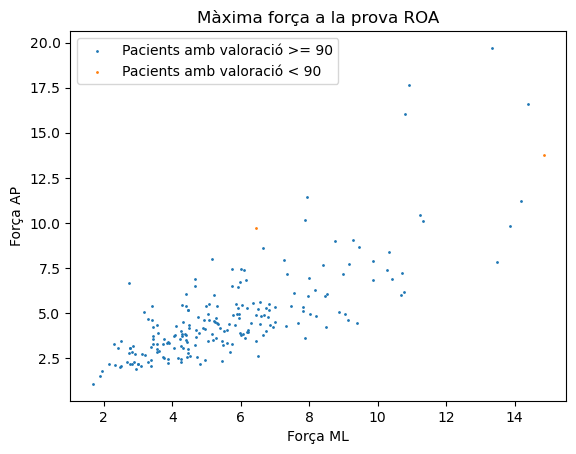

In [89]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(norm_ROAx, norm_ROAy, s = 1, label="Pacients amb valoració >= 90")
ax1.scatter(not_norm_ROAx, not_norm_ROAy, s = 1, label="Pacients amb valoració < 90")
ax1.set_title("Màxima força a la prova ROA")
ax1.set_xlabel("Força ML")
ax1.set_ylabel("Força AP")
plt.legend()


plt.show()

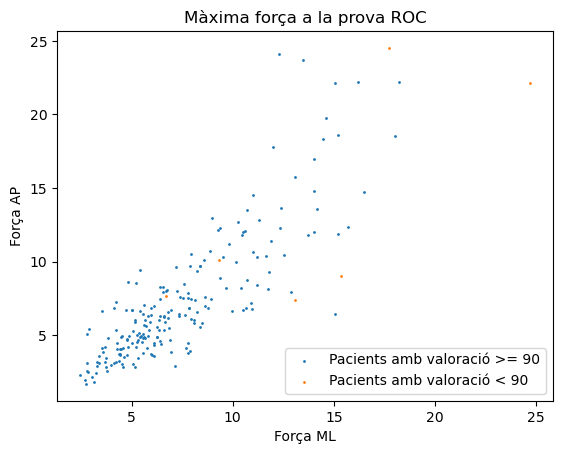

In [90]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(norm_ROCx, norm_ROCy, s = 1, label="Pacients amb valoració >= 90")
ax1.scatter(not_norm_ROCx, not_norm_ROCy, s = 1, label="Pacients amb valoració < 90")
ax1.set_title("Màxima força a la prova ROC")
ax1.set_xlabel("Força ML")
ax1.set_ylabel("Força AP")
plt.legend()

plt.show()

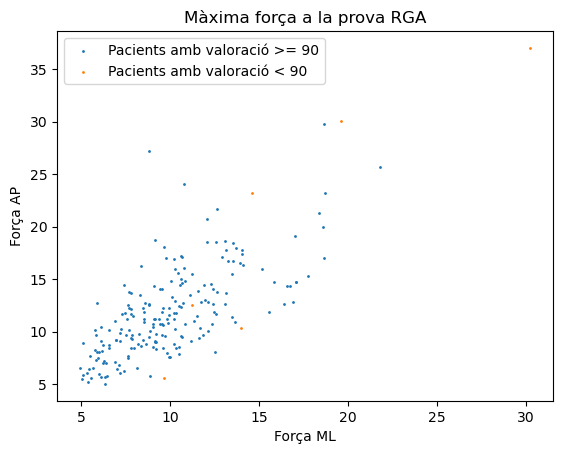

In [92]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(norm_RGAx, norm_RGAy, s = 1, label="Pacients amb valoració >= 90")
ax1.scatter(not_norm_RGAx, not_norm_RGAy, s = 1, label="Pacients amb valoració < 90")
ax1.set_title("Màxima força a la prova RGA")
ax1.set_xlabel("Força ML")
ax1.set_ylabel("Força AP")
plt.legend()

plt.show()

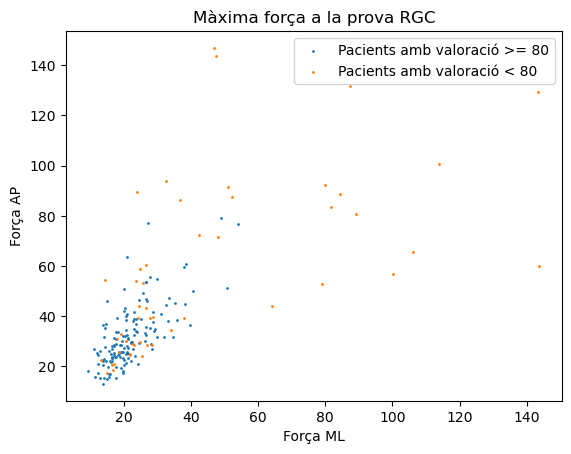

In [95]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(norm_RGCx, norm_RGCy, s = 1, label="Pacients amb valoració >= 80")
ax1.scatter(not_norm_RGCx, not_norm_RGCy, s = 1, label="Pacients amb valoració < 80")
ax1.set_title("Màxima força a la prova RGC")
ax1.set_xlabel("Força ML")
ax1.set_ylabel("Força AP")
plt.legend()

plt.show()

In [116]:
def distancia_al_limite_de_la_normalidad(punto, conjunto_de_puntos):
    """
    Calcula la distancia al límite de la normalidad de un punto de dos dimensiones respecto de un conjunto de puntos de dos dimensiones.

    Args:
    punto: El punto que se quiere calcular la distancia.
    conjunto_de_puntos: El conjunto de puntos respecto del que se quiere calcular la distancia.

    Returns:
    La distancia al límite de la normalidad del punto respecto del conjunto de puntos.
    """

    media = np.mean(conjunto_de_puntos, axis=0)
    desviacion_estandar = np.std(conjunto_de_puntos, axis=0)
    distanciax = punto[0] - media[0]
    distanciay = punto[1] - media[1]
    #print(distanciax)
    #print(distanciay)
    #print(desviacion_estandar[0])
    #print(desviacion_estandar[1])
    return np.sqrt((distanciax / desviacion_estandar[0])**2 + (distanciay / desviacion_estandar[1])**2)

In [120]:
norm_ROA = np.vstack((norm_ROAx, norm_ROAy)).T
norm_ROA = norm_ROA.tolist()

not_norm_ROA = np.vstack((not_norm_ROAx, not_norm_ROAy)).T
not_norm_ROA = not_norm_ROA.tolist()

dist_norm = []
dist_not_norm = []

for p in norm_ROA:
    dist_norm.append(distancia_al_limite_de_la_normalidad(p, norm_ROA))

for p in not_norm_ROA:
    dist_not_norm.append(distancia_al_limite_de_la_normalidad(p, norm_ROA))    

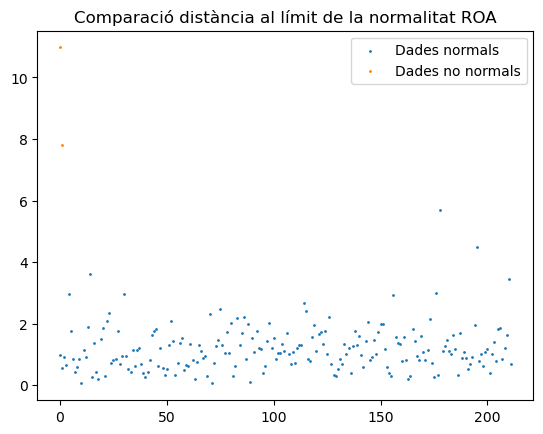

In [126]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(range(0,len(dist_norm)), dist_norm, s = 1, label="Dades normals")
ax1.scatter(range(0,len(dist_not_norm)), dist_not_norm, s = 1, label="Dades no normals")
ax1.set_title("Comparació distància al límit de la normalitat ROA")
plt.legend()

plt.show()

In [127]:
norm_ROC = np.vstack((norm_ROCx, norm_ROCy)).T
norm_ROC = norm_ROC.tolist()

not_norm_ROC = np.vstack((not_norm_ROCx, not_norm_ROCy)).T
not_norm_ROC = not_norm_ROC.tolist()

dist_norm = []
dist_not_norm = []

for p in norm_ROC:
    dist_norm.append(distancia_al_limite_de_la_normalidad(p, norm_ROC))

for p in not_norm_ROC:
    dist_not_norm.append(distancia_al_limite_de_la_normalidad(p, norm_ROC))    

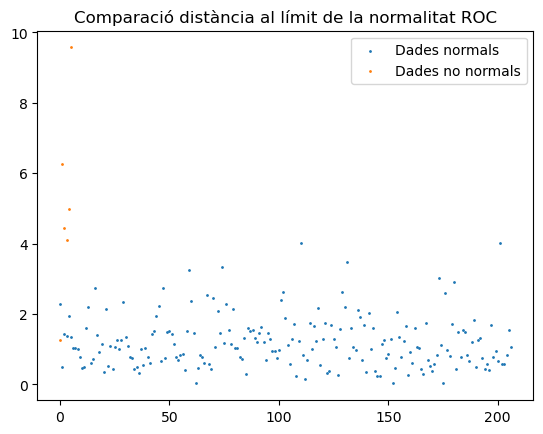

In [128]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(range(0,len(dist_norm)), dist_norm, s = 1, label="Dades normals")
ax1.scatter(range(0,len(dist_not_norm)), dist_not_norm, s = 1, label="Dades no normals")
ax1.set_title("Comparació distància al límit de la normalitat ROC")
plt.legend()

plt.show()

In [129]:
norm_RGA = np.vstack((norm_RGAx, norm_RGAy)).T
norm_RGA = norm_RGA.tolist()

not_norm_RGA = np.vstack((not_norm_RGAx, not_norm_RGAy)).T
not_norm_RGA = not_norm_RGA.tolist()

dist_norm = []
dist_not_norm = []

for p in norm_RGA:
    dist_norm.append(distancia_al_limite_de_la_normalidad(p, norm_RGA))

for p in not_norm_RGA:
    dist_not_norm.append(distancia_al_limite_de_la_normalidad(p, norm_RGA))

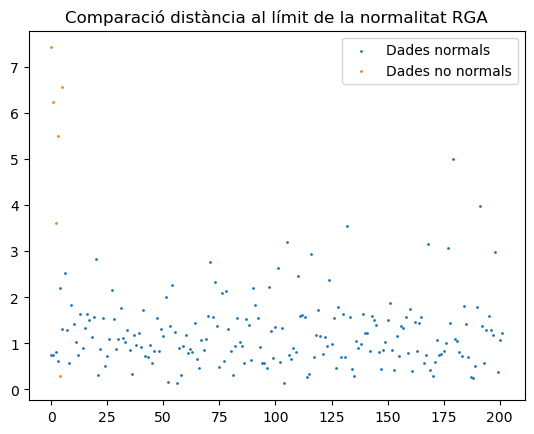

In [130]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(range(0,len(dist_norm)), dist_norm, s = 1, label="Dades normals")
ax1.scatter(range(0,len(dist_not_norm)), dist_not_norm, s = 1, label="Dades no normals")
ax1.set_title("Comparació distància al límit de la normalitat RGA")
plt.legend()

plt.show()

In [131]:
norm_RGC = np.vstack((norm_RGCx, norm_RGCy)).T
norm_RGC = norm_RGC.tolist()

not_norm_RGC = np.vstack((not_norm_RGCx, not_norm_RGCy)).T
not_norm_RGC = not_norm_RGC.tolist()

dist_norm = []
dist_not_norm = []

for p in norm_RGC:
    dist_norm.append(distancia_al_limite_de_la_normalidad(p, norm_RGC))

for p in not_norm_RGC:
    dist_not_norm.append(distancia_al_limite_de_la_normalidad(p, norm_RGC))

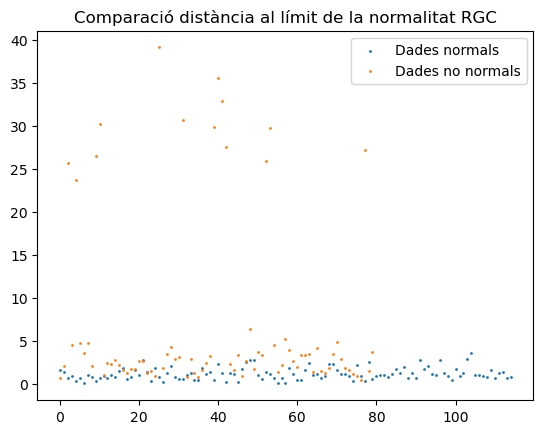

In [132]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(range(0,len(dist_norm)), dist_norm, s = 1, label="Dades normals")
ax1.scatter(range(0,len(dist_not_norm)), dist_not_norm, s = 1, label="Dades no normals")
ax1.set_title("Comparació distància al límit de la normalitat RGC")
plt.legend()

plt.show()

In [112]:
import os

norm_ROAx = []
norm_ROAy = []

norm_ROCx = []
norm_ROCy = []

norm_RGAx = []
norm_RGAy = []

norm_RGCx = []
norm_RGCy = []

not_norm_ROAx = []
not_norm_ROAy = []

not_norm_ROCx = []
not_norm_ROCy = []

not_norm_RGAx = []
not_norm_RGAy = []

not_norm_RGCx = []
not_norm_RGCy = []

edats = []

for filename in os.listdir("C:/Users/Usuario/OneDrive/Escritorio/Universitat/TFG/Mataro_posturograf"):
    if filename.endswith('.txt'):
        reader = pd.read_csv("C:/Users/Usuario/OneDrive/Escritorio/Universitat/TFG/Mataro_posturograf/" + filename, delimiter="\t", encoding="ansi", skiprows=1, chunksize=1, header=None)
        df_dades = reader.get_chunk()
        if df_dades[[9]].values[0][0] > 67:
            edats.append(df_dades[[9]].values[0][0])
            num_test = df_dades[[16]].values[0] + df_dades[[21]].values[0] + df_dades[[26]].values[0] + df_dades[[31]].values[0]
            df_dades_postu_xy = pd.read_csv("C:/Users/Usuario/OneDrive/Escritorio/Universitat/TFG/Mataro_posturograf/" + filename, delimiter="\t", encoding="ansi",skiprows=(17+int(num_test)), chunksize=1200, index_col=False).get_chunk()
            
            #if isinstance(df_dades[[18]].values[0][0], float) and df_dades[[18]].values[0][0] > 90:
            if isinstance(df_dades[[17]].values[0][0], float) and df_dades[[17]].values[0][0] > 90:     
                valorsy = list(map(float, df_dades_postu_xy[find_last_string_with_text("ROA", df_dades_postu_xy.columns.tolist()[:-1])].values.tolist()[0:1200]))
                valorsx = list(map(float, df_dades_postu_xy[find_last_string_with_text("ROA", df_dades_postu_xy.columns.tolist()[:-1])[0:-1] + "X"].values.tolist()[0:1200]))
                norm_ROAy.append(max(valorsy)-min(valorsy))
                norm_ROAx.append(max(valorsx)-min(valorsx))
            else:
                if 'ROA' in '\t'.join(df_dades_postu_xy.columns.tolist()[:-1]):                
                    valorsy = list(map(float, df_dades_postu_xy[find_last_string_with_text("ROA", df_dades_postu_xy.columns.tolist()[:-1])].values.tolist()[0:1200]))
                    valorsx = list(map(float, df_dades_postu_xy[find_last_string_with_text("ROA", df_dades_postu_xy.columns.tolist()[:-1])[0:-1] + "X"].values.tolist()[0:1200]))
                    not_norm_ROAy.append(max(valorsy)-min(valorsy))
                    not_norm_ROAx.append(max(valorsx)-min(valorsx))
                        
            #if isinstance(df_dades[[23]].values[0][0], float) and df_dades[[23]].values[0][0] > 90:                    
            if isinstance(df_dades[[22]].values[0][0], float) and df_dades[[22]].values[0][0] > 90:
                    valorsy = list(map(float, df_dades_postu_xy[find_last_string_with_text("ROC", df_dades_postu_xy.columns.tolist()[:-1])].values.tolist()[0:1200]))                            
                    valorsx = list(map(float, df_dades_postu_xy[find_last_string_with_text("ROC", df_dades_postu_xy.columns.tolist()[:-1])[0:-1] + "X"].values.tolist()[0:1200]))            
                    norm_ROCy.append(max(valorsy)-min(valorsy))
                    norm_ROCx.append(max(valorsx)-min(valorsx))
            else:
                if 'ROC' in '\t'.join(df_dades_postu_xy.columns.tolist()[:-1]):                
                    valorsy = list(map(float, df_dades_postu_xy[find_last_string_with_text("ROC", df_dades_postu_xy.columns.tolist()[:-1])].values.tolist()[0:1200]))                            
                    valorsx = list(map(float, df_dades_postu_xy[find_last_string_with_text("ROC", df_dades_postu_xy.columns.tolist()[:-1])[0:-1] + "X"].values.tolist()[0:1200]))            
                    not_norm_ROCy.append(max(valorsy)-min(valorsy))
                    not_norm_ROCx.append(max(valorsx)-min(valorsx)) 
                        
            #if isinstance(df_dades[[28]].values[0][0], float) and df_dades[[28]].values[0][0] > 90:
            if isinstance(df_dades[[27]].values[0][0], float) and df_dades[[27]].values[0][0] > 90:

                    valorsy = list(map(float, df_dades_postu_xy[find_last_string_with_text("RGA", df_dades_postu_xy.columns.tolist()[:-1])].values.tolist()[0:1200]))
                    valorsx = list(map(float, df_dades_postu_xy[find_last_string_with_text("RGA", df_dades_postu_xy.columns.tolist()[:-1])[0:-1] + "X"].values.tolist()[0:1200]))
                    norm_RGAy.append(max(valorsy)-min(valorsy))
                    norm_RGAx.append(max(valorsx)-min(valorsx))
            else:
                if 'RGA' in '\t'.join(df_dades_postu_xy.columns.tolist()[:-1]):
                    valorsy = list(map(float, df_dades_postu_xy[find_last_string_with_text("RGA", df_dades_postu_xy.columns.tolist()[:-1])].values.tolist()[0:1200]))
                    valorsx = list(map(float, df_dades_postu_xy[find_last_string_with_text("RGA", df_dades_postu_xy.columns.tolist()[:-1])[0:-1] + "X"].values.tolist()[0:1200]))
                    not_norm_RGAy.append(max(valorsy)-min(valorsy))
                    not_norm_RGAx.append(max(valorsx)-min(valorsx))   
                        
            #if isinstance(df_dades[[33]].values[0][0], float) and df_dades[[33]].values[0][0] > 90:                    
            if isinstance(df_dades[[32]].values[0][0], float) and df_dades[[32]].values[0][0] > 90:
                    valorsy = list(map(float, df_dades_postu_xy[find_last_string_with_text("RGC", df_dades_postu_xy.columns.tolist()[:-1])].values.tolist()[0:1200]))
                    valorsx = list(map(float, df_dades_postu_xy[find_last_string_with_text("RGC", df_dades_postu_xy.columns.tolist()[:-1])[0:-1] + "X"].values.tolist()[0:1200]))
                    norm_RGCy.append(max(valorsy)-min(valorsy))
                    norm_RGCx.append(max(valorsx)-min(valorsx))
            else:
                if 'RGC' in '\t'.join(df_dades_postu_xy.columns.tolist()[:-1]):
                    valorsy = list(map(float, df_dades_postu_xy[find_last_string_with_text("RGC", df_dades_postu_xy.columns.tolist()[:-1])].values.tolist()[0:1200]))
                    valorsx = list(map(float, df_dades_postu_xy[find_last_string_with_text("RGC", df_dades_postu_xy.columns.tolist()[:-1])[0:-1] + "X"].values.tolist()[0:1200]))
                    not_norm_RGCy.append(max(valorsy)-min(valorsy))
                    not_norm_RGCx.append(max(valorsx)-min(valorsx))                


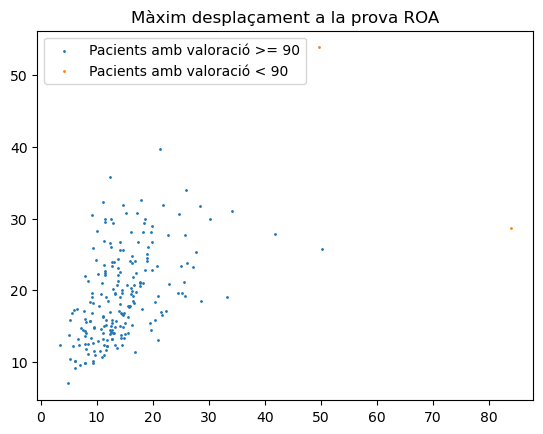

In [108]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(norm_ROAx, norm_ROAy, s = 1, label="Pacients amb valoració >= 90")
ax1.scatter(not_norm_ROAx, not_norm_ROAy, s = 1, label="Pacients amb valoració < 90")
ax1.set_title("Màxim desplaçament a la prova ROA")
plt.legend()

plt.show()

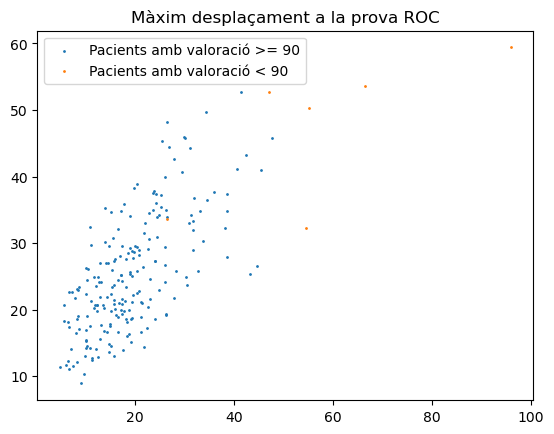

In [109]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(norm_ROCx, norm_ROCy, s = 1, label="Pacients amb valoració >= 90")
ax1.scatter(not_norm_ROCx, not_norm_ROCy, s = 1, label="Pacients amb valoració < 90")
ax1.set_title("Màxim desplaçament a la prova ROC")
plt.legend()

plt.show()

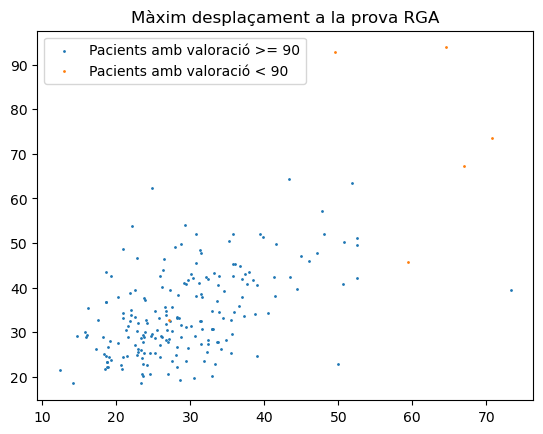

In [110]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(norm_RGAx, norm_RGAy, s = 1, label="Pacients amb valoració >= 90")
ax1.scatter(not_norm_RGAx, not_norm_RGAy, s = 1, label="Pacients amb valoració < 90")
ax1.set_title("Màxim desplaçament a la prova RGA")
plt.legend()

plt.show()

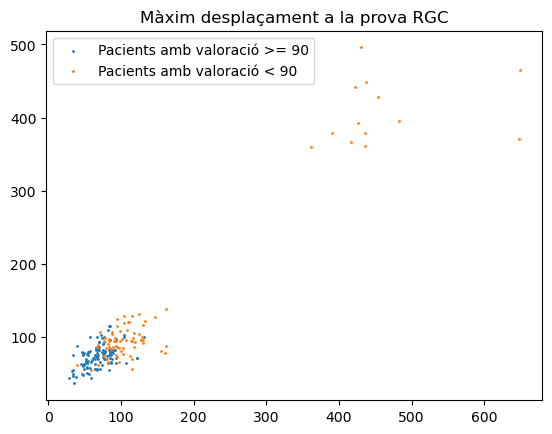

In [113]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(norm_RGCx, norm_RGCy, s = 1, label="Pacients amb valoració >= 90")
ax1.scatter(not_norm_RGCx, not_norm_RGCy, s = 1, label="Pacients amb valoració < 90")
ax1.set_title("Màxim desplaçament a la prova RGC")
plt.legend()

plt.show()